In [1]:
import pandas as pd

df_matchups = pd.read_csv('../resources/data/unprocessed/SampleSubmission2023.csv')

df_matchups

,ID,Pred
0,2023_1101_1102,0.5
1,2023_1101_1103,0.5
2,2023_1101_1104,0.5
3,2023_1101_1105,0.5
4,2023_1101_1106,0.5
...,...,...
130678,2023_3474_3476,0.5
130679,2023_3474_3477,0.5
130680,2023_3475_3476,0.5
130681,2023_3475_3477,0.5


In [2]:
df_matchups[['season', 'team0', 'team1']] = df_matchups['ID'].str.split('_').to_list()

df_matchups[['season', 'team0', 'team1']] = df_matchups[['season', 'team0', 'team1']].astype(int)

df_matchups = df_matchups.loc[df_matchups['team0'] < 2000, :].reset_index()

df_matchups.head()

,index,ID,Pred,season,team0,team1
0,0,2023_1101_1102,0.5,2023,1101,1102
1,1,2023_1101_1103,0.5,2023,1101,1103
2,2,2023_1101_1104,0.5,2023,1101,1104
3,3,2023_1101_1105,0.5,2023,1101,1105
4,4,2023_1101_1106,0.5,2023,1101,1106


In [3]:
df_seeds = pd.read_csv('../resources/data/unprocessed/MNCAATourneySeeds.csv')

df_seeds = df_seeds.loc[df_seeds['Season'] == 2023, :].drop(columns=['Season']).reset_index(drop=True)

df_seeds

,Seed,TeamID
0,W01,1345
1,W02,1266
2,W03,1243
3,W04,1397
4,W05,1181
...,...,...
63,Z12,1433
64,Z13,1233
65,Z14,1213
66,Z15,1421


In [4]:
df_seeds['PlayIn'] = 0
df_seeds.loc[df_seeds['Seed'].str[-1].str.isalpha(), 'PlayIn'] = 1

df_seeds['Region'] = df_seeds['Seed'].str[0]

df_seeds['Seed'] = df_seeds['Seed'].str.extract('(\d+)').astype(int)

df_seeds

,Seed,TeamID,PlayIn,Region
0,1,1345,0,W
1,2,1266,0,W
2,3,1243,0,W
3,4,1397,0,W
4,5,1181,0,W
...,...,...,...,...
63,12,1433,0,Z
64,13,1233,0,Z
65,14,1213,0,Z
66,15,1421,0,Z


In [5]:
df_matchups[['team0_seed', 'team0_region', 'team0_playin']] = df_matchups.merge(
    df_seeds, how='left', 
    left_on=['team0'], right_on=['TeamID'])[['Seed', 'Region', 'PlayIn']]

df_matchups[['team1_seed', 'team1_region', 'team1_playin']] = df_matchups.merge(
    df_seeds, how='left', 
    left_on=['team1'], right_on=['TeamID'])[['Seed', 'Region', 'PlayIn']]

df_matchups

,index,ID,Pred,season,team0,team1,team0_seed,team0_region,team0_playin,team1_seed,team1_region,team1_playin
0,0,2023_1101_1102,0.5,2023,1101,1102,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023_1101_1103,0.5,2023,1101,1103,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2023_1101_1104,0.5,2023,1101,1104,NaN,NaN,NaN,1.0,X,0.0
3,3,2023_1101_1105,0.5,2023,1101,1105,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2023_1101_1106,0.5,2023,1101,1106,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
65698,65698,2023_1474_1476,0.5,2023,1474,1476,NaN,NaN,NaN,NaN,NaN,NaN
65699,65699,2023_1474_1477,0.5,2023,1474,1477,NaN,NaN,NaN,NaN,NaN,NaN
65700,65700,2023_1475_1476,0.5,2023,1475,1476,NaN,NaN,NaN,NaN,NaN,NaN
65701,65701,2023_1475_1477,0.5,2023,1475,1477,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_matchups = df_matchups.loc[~df_matchups['team0_seed'].isna() & 
                              ~df_matchups['team1_seed'].isna(), :].reset_index(drop=True)

df_matchups

,index,ID,Pred,season,team0,team1,team0_seed,team0_region,team0_playin,team1_seed,team1_region,team1_playin
0,1089,2023_1104_1112,0.5,2023,1104,1112,1.0,X,0.0,2.0,X,0.0
1,1090,2023_1104_1113,0.5,2023,1104,1113,1.0,X,0.0,11.0,Z,1.0
2,1093,2023_1104_1116,0.5,2023,1104,1116,1.0,X,0.0,8.0,Z,0.0
3,1096,2023_1104_1120,0.5,2023,1104,1120,1.0,X,0.0,9.0,Y,0.0
4,1099,2023_1104_1124,0.5,2023,1104,1124,1.0,X,0.0,3.0,X,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2273,64936,2023_1436_1452,0.5,2023,1436,1452,15.0,W,0.0,9.0,X,0.0
2274,64946,2023_1436_1462,0.5,2023,1436,1462,15.0,W,0.0,3.0,Y,0.0
2275,65011,2023_1438_1452,0.5,2023,1438,1452,4.0,X,0.0,9.0,X,0.0
2276,65021,2023_1438_1462,0.5,2023,1438,1462,4.0,X,0.0,3.0,Y,0.0


In [7]:
same_region = df_matchups['team0_region'] == df_matchups['team1_region']

round_0_condition = (df_matchups['team0_playin'] == 1) & (df_matchups['team1_playin'] == 1)

round_1_condition = df_matchups['team0_seed'] + df_matchups['team1_seed'] == 17

round_2_condition = (
    (df_matchups['team0_seed'].isin([1, 16]) & df_matchups['team1_seed'].isin([8, 9])) | 
    (df_matchups['team0_seed'].isin([8, 9]) & df_matchups['team1_seed'].isin([1, 16])) |
    (df_matchups['team0_seed'].isin([5, 12]) & df_matchups['team1_seed'].isin([4, 13])) | 
    (df_matchups['team0_seed'].isin([4, 13]) & df_matchups['team1_seed'].isin([5, 12])) |
    (df_matchups['team0_seed'].isin([6, 11]) & df_matchups['team1_seed'].isin([3, 14])) | 
    (df_matchups['team0_seed'].isin([3, 14]) & df_matchups['team1_seed'].isin([6, 11])) |
    (df_matchups['team0_seed'].isin([7, 10]) & df_matchups['team1_seed'].isin([2, 15])) | 
    (df_matchups['team0_seed'].isin([2, 15]) & df_matchups['team1_seed'].isin([7, 10]))
)

round_3_condition = (
    (df_matchups['team0_seed'].isin([1, 16, 8, 9]) & df_matchups['team1_seed'].isin([5, 12, 4, 13])) | 
    (df_matchups['team0_seed'].isin([5, 12, 4, 13]) & df_matchups['team1_seed'].isin([1, 16, 8, 9])) |
    (df_matchups['team0_seed'].isin([6, 11, 3, 14]) & df_matchups['team1_seed'].isin([7, 10, 2, 15])) | 
    (df_matchups['team0_seed'].isin([7, 10, 2, 15]) & df_matchups['team1_seed'].isin([6, 11, 3, 14]))
)

round_4_condition = (
    (df_matchups['team0_seed'].isin([1, 16, 8, 9, 5, 12, 4, 13]) & df_matchups['team1_seed'].isin([6, 11, 3, 14, 7, 10, 2, 15])) | 
    (df_matchups['team0_seed'].isin([6, 11, 3, 14, 7, 10, 2, 15]) & df_matchups['team1_seed'].isin([1, 16, 8, 9, 5, 12, 4, 13]))
)

round_5_condition = (
    (df_matchups['team0_region'].isin(['W']) & df_matchups['team1_region'].isin(['X'])) | 
    (df_matchups['team0_region'].isin(['X']) & df_matchups['team1_region'].isin(['W'])) |
    (df_matchups['team0_region'].isin(['Y']) & df_matchups['team1_region'].isin(['Z'])) | 
    (df_matchups['team0_region'].isin(['Z']) & df_matchups['team1_region'].isin(['Y']))
)

round_6_condition = (
    (df_matchups['team0_region'].isin(['W', 'X']) & df_matchups['team1_region'].isin(['Y', 'Z'])) | 
    (df_matchups['team0_region'].isin(['Y', 'Z']) & df_matchups['team1_region'].isin(['W', 'X'])) 
)

round_6_condition

0       False
1        True
2        True
3        True
4       False
        ...  
2273    False
2274     True
2275    False
2276     True
2277     True
Length: 2278, dtype: bool

In [8]:
df_matchups['round'] = -1

df_matchups.loc[round_6_condition, 'round'] = 6

df_matchups.loc[round_5_condition, 'round'] = 5

df_matchups.loc[round_4_condition & same_region, 'round'] = 4

df_matchups.loc[round_3_condition & same_region, 'round'] = 3

df_matchups.loc[round_2_condition & same_region, 'round'] = 2

df_matchups.loc[round_1_condition & same_region, 'round'] = 1

df_matchups.loc[round_0_condition & same_region, 'round'] = 0

df_matchups

,index,ID,Pred,season,team0,team1,team0_seed,team0_region,team0_playin,team1_seed,team1_region,team1_playin,round
0,1089,2023_1104_1112,0.5,2023,1104,1112,1.0,X,0.0,2.0,X,0.0,4
1,1090,2023_1104_1113,0.5,2023,1104,1113,1.0,X,0.0,11.0,Z,1.0,6
2,1093,2023_1104_1116,0.5,2023,1104,1116,1.0,X,0.0,8.0,Z,0.0,6
3,1096,2023_1104_1120,0.5,2023,1104,1120,1.0,X,0.0,9.0,Y,0.0,6
4,1099,2023_1104_1124,0.5,2023,1104,1124,1.0,X,0.0,3.0,X,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,64936,2023_1436_1452,0.5,2023,1436,1452,15.0,W,0.0,9.0,X,0.0,5
2274,64946,2023_1436_1462,0.5,2023,1436,1462,15.0,W,0.0,3.0,Y,0.0,6
2275,65011,2023_1438_1452,0.5,2023,1438,1452,4.0,X,0.0,9.0,X,0.0,3
2276,65021,2023_1438_1462,0.5,2023,1438,1462,4.0,X,0.0,3.0,Y,0.0,6


MAKE SURE THAT PREDICTIONS ARE UPDATED

In [9]:
df = pd.read_pickle('../resources/data/preprocessed/mens_predictions.pkl')

df

,season,team0,team1,prediction
0,2023,1101,1102,0.246191
1,2023,1101,1103,0.211163
2,2023,1101,1104,0.023060
3,2023,1101,1105,0.884464
4,2023,1101,1106,0.907516
...,...,...,...,...
65698,2023,1474,1476,0.827686
65699,2023,1474,1477,0.840016
65700,2023,1475,1476,0.766101
65701,2023,1475,1477,0.705675


In [10]:
df['team0_prob'] = df['prediction']
df['team1_prob'] = 1 - df['prediction']

df.drop(columns=['prediction'], inplace=True)

df

,season,team0,team1,team0_prob,team1_prob
0,2023,1101,1102,0.246191,0.753809
1,2023,1101,1103,0.211163,0.788837
2,2023,1101,1104,0.023060,0.976940
3,2023,1101,1105,0.884464,0.115536
4,2023,1101,1106,0.907516,0.092484
...,...,...,...,...,...
65698,2023,1474,1476,0.827686,0.172314
65699,2023,1474,1477,0.840016,0.159984
65700,2023,1475,1476,0.766101,0.233899
65701,2023,1475,1477,0.705675,0.294325


In [11]:
df_matchups = df_matchups.merge(df, how='left', on=['season', 'team0', 'team1'])

df_matchups

,index,ID,Pred,season,team0,team1,team0_seed,team0_region,team0_playin,team1_seed,team1_region,team1_playin,round,team0_prob,team1_prob
0,1089,2023_1104_1112,0.5,2023,1104,1112,1.0,X,0.0,2.0,X,0.0,4,0.622457,0.377543
1,1090,2023_1104_1113,0.5,2023,1104,1113,1.0,X,0.0,11.0,Z,1.0,6,0.872376,0.127624
2,1093,2023_1104_1116,0.5,2023,1104,1116,1.0,X,0.0,8.0,Z,0.0,6,0.775716,0.224284
3,1096,2023_1104_1120,0.5,2023,1104,1120,1.0,X,0.0,9.0,Y,0.0,6,0.775716,0.224284
4,1099,2023_1104_1124,0.5,2023,1104,1124,1.0,X,0.0,3.0,X,0.0,4,0.671660,0.328340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,64936,2023_1436_1452,0.5,2023,1436,1452,15.0,W,0.0,9.0,X,0.0,5,0.115340,0.884660
2274,64946,2023_1436_1462,0.5,2023,1436,1462,15.0,W,0.0,3.0,Y,0.0,6,0.171308,0.828692
2275,65011,2023_1438_1452,0.5,2023,1438,1452,4.0,X,0.0,9.0,X,0.0,3,0.440072,0.559928
2276,65021,2023_1438_1462,0.5,2023,1438,1462,4.0,X,0.0,3.0,Y,0.0,6,0.417958,0.582042


<AxesSubplot:>

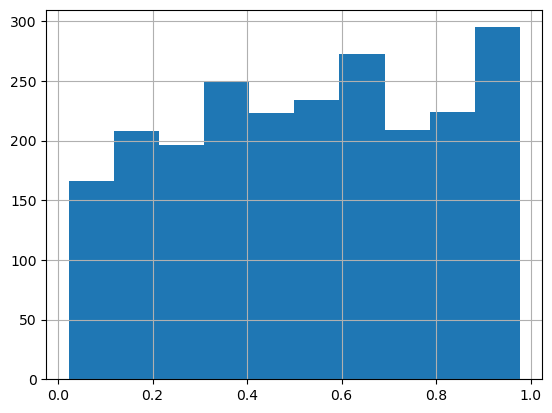

In [12]:
df_matchups['team0_prob'].hist()

In [13]:
df_matchups['team0_prob'].describe()

count    2278.000000
mean        0.530398
std         0.274042
min         0.023060
25%         0.308978
50%         0.541024
75%         0.766101
max         0.976936
Name: team0_prob, dtype: float64

In [14]:
df_probs = df_matchups[['team0', 'team1', 'team0_prob', 'team1_prob']].copy()

df_probs

,team0,team1,team0_prob,team1_prob
0,1104,1112,0.622457,0.377543
1,1104,1113,0.872376,0.127624
2,1104,1116,0.775716,0.224284
3,1104,1120,0.775716,0.224284
4,1104,1124,0.671660,0.328340
...,...,...,...,...
2273,1436,1452,0.115340,0.884660
2274,1436,1462,0.171308,0.828692
2275,1438,1452,0.440072,0.559928
2276,1438,1462,0.417958,0.582042


In [15]:
def create_bracket_list(df_seeds=df_seeds):
    round0 = []
    region = ['W', 'X', 'Y', 'Z']
    for r in region:
        # print(r)
        for s in [1, 8, 5, 4, 6, 3, 7, 2]:
            a = df_seeds.loc[(df_seeds['Region'] == r) & (df_seeds['Seed'] == s), 'TeamID']
            if a.shape[0] == 1: round0.append([a.iloc[0]])
            else: round0.append([a.iloc[0], a.iloc[1]])
            
            
            
            b = df_seeds.loc[(df_seeds['Region'] == r) & (df_seeds['Seed'] == 17 - s), 'TeamID']
            if b.shape[0] == 1: round0.append([b.iloc[0]])
            else: round0.append([b.iloc[0], b.iloc[1]])
            
            # print()
    return round0
            
round0 = create_bracket_list()
round0

[[1345],
 [1192, 1411],
 [1272],
 [1194],
 [1181],
 [1331],
 [1397],
 [1418],
 [1246],
 [1344],
 [1243],
 [1286],
 [1277],
 [1425],
 [1266],
 [1436],
 [1104],
 [1369, 1394],
 [1268],
 [1452],
 [1361],
 [1158],
 [1438],
 [1202],
 [1166],
 [1301],
 [1124],
 [1364],
 [1281],
 [1429],
 [1112],
 [1343],
 [1222],
 [1297],
 [1234],
 [1120],
 [1274],
 [1179],
 [1231],
 [1245],
 [1235],
 [1280, 1338],
 [1462],
 [1244],
 [1401],
 [1336],
 [1400],
 [1159],
 [1242],
 [1224],
 [1116],
 [1228],
 [1388],
 [1433],
 [1163],
 [1233],
 [1395],
 [1113, 1305],
 [1211],
 [1213],
 [1321],
 [1129],
 [1417],
 [1421]]

Get rid of playins for simplicity:

In [16]:
df_probs.loc[(df_probs['team0'] == 1192) & (df_probs['team1'] == 1411), :]

,team0,team1,team0_prob,team1_prob
836,1192,1411,0.458292,0.541708


In [17]:
df_probs.loc[(df_probs['team0'] == 1369) & (df_probs['team1'] == 1394), :]

,team0,team1,team0_prob,team1_prob
2126,1369,1394,0.280116,0.719884


In [18]:
df_probs.loc[(df_probs['team0'] == 1280) & (df_probs['team1'] == 1338), :]

,team0,team1,team0_prob,team1_prob
1758,1280,1338,0.612794,0.387206


In [19]:
df_probs.loc[(df_probs['team0'] == 1113) & (df_probs['team1'] == 1305), :]

,team0,team1,team0_prob,team1_prob
170,1113,1305,0.49326,0.50674


In [20]:
round0[-7]

[1113, 1305]

In [21]:
round0[1] = [1192]
round0[17] = [1394]
round0[41] = [1338]
round0[-7] = [1113]

round0

[[1345],
 [1192],
 [1272],
 [1194],
 [1181],
 [1331],
 [1397],
 [1418],
 [1246],
 [1344],
 [1243],
 [1286],
 [1277],
 [1425],
 [1266],
 [1436],
 [1104],
 [1394],
 [1268],
 [1452],
 [1361],
 [1158],
 [1438],
 [1202],
 [1166],
 [1301],
 [1124],
 [1364],
 [1281],
 [1429],
 [1112],
 [1343],
 [1222],
 [1297],
 [1234],
 [1120],
 [1274],
 [1179],
 [1231],
 [1245],
 [1235],
 [1338],
 [1462],
 [1244],
 [1401],
 [1336],
 [1400],
 [1159],
 [1242],
 [1224],
 [1116],
 [1228],
 [1388],
 [1433],
 [1163],
 [1233],
 [1395],
 [1113],
 [1211],
 [1213],
 [1321],
 [1129],
 [1417],
 [1421]]

In [22]:
import numpy as np

def simulate_round(prev_round, prev_round_number, df_probs=df_probs):
    if prev_round_number == 6:
        team0 = min(prev_round[0])
        team1 = max(prev_round[0])
        team0_prob = df_probs.loc[(df_probs['team0'] == team0) & (df_probs['team1'] == team1), 'team0_prob'].iloc[0]
        a = np.random.choice([team0, team1], p=[team0_prob, 1 - team0_prob])
        
        if a == team0: d = {team0: 7, team1: 6}
        else:          d = {team0: 6, team1: 7}
        
        return [a], d
    
    
    new_round = []
    d = {}
    for index in range(0, len(prev_round), 2):
        if len(prev_round[index]) == 1: a = prev_round[index][0]
        else: 
            team0 = min(prev_round[index])
            team1 = max(prev_round[index])
            team0_prob = df_probs.loc[(df_probs['team0'] == team0) & (df_probs['team1'] == team1), 'team0_prob'].iloc[0]
            a = np.random.choice([team0, team1], p=[team0_prob, 1 - team0_prob])
            
            if a == team0: d[team1] = prev_round_number
            else:          d[team0] = prev_round_number
        
        
        
        
        
        if len(prev_round[index+1]) == 1: b = prev_round[index+1][0]
        else: 
            team0 = min(prev_round[index+1])
            team1 = max(prev_round[index+1])
            team0_prob = df_probs.loc[(df_probs['team0'] == team0) & (df_probs['team1'] == team1), 'team0_prob'].iloc[0]
            b = np.random.choice([team0, team1], p=[team0_prob, 1 - team0_prob])
            
            if b == team0: d[team1] = prev_round_number
            else:          d[team0] = prev_round_number
        
        new_round.append([a, b])
        
    return new_round, d

simulate_round(round0, 0)

([[1345, 1192],
  [1272, 1194],
  [1181, 1331],
  [1397, 1418],
  [1246, 1344],
  [1243, 1286],
  [1277, 1425],
  [1266, 1436],
  [1104, 1394],
  [1268, 1452],
  [1361, 1158],
  [1438, 1202],
  [1166, 1301],
  [1124, 1364],
  [1281, 1429],
  [1112, 1343],
  [1222, 1297],
  [1234, 1120],
  [1274, 1179],
  [1231, 1245],
  [1235, 1338],
  [1462, 1244],
  [1401, 1336],
  [1400, 1159],
  [1242, 1224],
  [1116, 1228],
  [1388, 1433],
  [1163, 1233],
  [1395, 1113],
  [1211, 1213],
  [1321, 1129],
  [1417, 1421]],
 {})

In [23]:
def simulate_bracket(tourney_round=round0):
    team_round_placements = {}
    for i in range(7):
        # print(i+1)
        tourney_round, new_dict_teams = simulate_round(tourney_round, i)
        # print(tourney_round)
        team_round_placements.update(new_dict_teams)
    
    return team_round_placements
        
placements = simulate_bracket()
placements

{1192: 1,
 1194: 1,
 1331: 1,
 1397: 1,
 1344: 1,
 1243: 1,
 1277: 1,
 1436: 1,
 1394: 1,
 1268: 1,
 1158: 1,
 1202: 1,
 1301: 1,
 1364: 1,
 1281: 1,
 1343: 1,
 1297: 1,
 1234: 1,
 1179: 1,
 1245: 1,
 1338: 1,
 1462: 1,
 1401: 1,
 1159: 1,
 1224: 1,
 1228: 1,
 1433: 1,
 1233: 1,
 1113: 1,
 1213: 1,
 1129: 1,
 1421: 1,
 1272: 2,
 1418: 2,
 1286: 2,
 1425: 2,
 1104: 2,
 1361: 2,
 1124: 2,
 1112: 2,
 1222: 2,
 1231: 2,
 1244: 2,
 1336: 2,
 1242: 2,
 1163: 2,
 1395: 2,
 1321: 2,
 1345: 3,
 1246: 3,
 1452: 3,
 1429: 3,
 1120: 3,
 1235: 3,
 1116: 3,
 1417: 3,
 1266: 4,
 1438: 4,
 1274: 4,
 1388: 4,
 1166: 5,
 1211: 5,
 1181: 6,
 1400: 7}

In [24]:
%%time

def get_team_probs(attempts=10000, round0=round0):
    for i in range(attempts):
        iteration_placements = simulate_bracket()
        # print(iteration_placements)
        
        if i == 0: all_placements = dict(zip(iteration_placements.keys(), [[i] for i in iteration_placements.values()]))
        else:
            for k, v in iteration_placements.items():
                all_placements[k].append(v)
                
    dict_probs = dict(zip(list(all_placements.keys()), [[(np.array(v) >= i).mean() for i in range(8)] for v in all_placements.values()]))
    return dict_probs
            
team_probs = get_team_probs()
team_probs

CPU times: total: 7min 20s
Wall time: 7min 26s


{1192: [1.0, 1.0, 0.0224, 0.0004, 0.0, 0.0, 0.0, 0.0],
 1194: [1.0, 1.0, 0.3853, 0.1572, 0.0736, 0.0347, 0.0138, 0.006],
 1331: [1.0, 1.0, 0.2319, 0.0695, 0.0158, 0.0048, 0.0013, 0.0002],
 1418: [1.0, 1.0, 0.1552, 0.0278, 0.0031, 0.0004, 0.0, 0.0],
 1344: [1.0, 1.0, 0.3725, 0.1639, 0.0458, 0.0116, 0.003, 0.0002],
 1286: [1.0, 1.0, 0.1703, 0.0221, 0.0031, 0.0002, 0.0001, 0.0],
 1425: [1.0, 1.0, 0.4, 0.1471, 0.0559, 0.0187, 0.0048, 0.0017],
 1436: [1.0, 1.0, 0.1096, 0.0169, 0.0037, 0.0007, 0.0001, 0.0001],
 1394: [1.0, 1.0, 0.0242, 0.0011, 0.0001, 0.0, 0.0, 0.0],
 1452: [1.0, 1.0, 0.5227, 0.1237, 0.0678, 0.0286, 0.0114, 0.0047],
 1361: [1.0, 1.0, 0.7047, 0.3903, 0.1603, 0.0799, 0.0371, 0.0155],
 1202: [1.0, 1.0, 0.1461, 0.0223, 0.0033, 0.0007, 0.0002, 0.0001],
 1301: [1.0, 1.0, 0.3063, 0.0943, 0.03, 0.0059, 0.002, 0.0004],
 1364: [1.0, 1.0, 0.1017, 0.0129, 0.0018, 0.0003, 0.0, 0.0],
 1281: [1.0, 1.0, 0.4089, 0.1411, 0.0462, 0.0139, 0.0054, 0.0011],
 1343: [1.0, 1.0, 0.1146, 0.0234, 0.003

In [25]:
df_team_probs = pd.DataFrame(team_probs).transpose().reset_index()

df_team_probs.columns = ['team_id', 'round0_cdf', 'round1_cdf', 'round2_cdf', 'round3_cdf', 
                         'round4_cdf', 'round5_cdf', 'round6_cdf', 'round7_cdf']

df_team_probs.head()

,team_id,round0_cdf,round1_cdf,round2_cdf,round3_cdf,round4_cdf,round5_cdf,round6_cdf,round7_cdf
0,1192,1.0,1.0,0.0224,0.0004,0.0000,0.0000,0.0000,0.0000
1,1194,1.0,1.0,0.3853,0.1572,0.0736,0.0347,0.0138,0.0060
2,1331,1.0,1.0,0.2319,0.0695,0.0158,0.0048,0.0013,0.0002
3,1418,1.0,1.0,0.1552,0.0278,0.0031,0.0004,0.0000,0.0000
4,1344,1.0,1.0,0.3725,0.1639,0.0458,0.0116,0.0030,0.0002


In [26]:
df_teams = pd.read_csv('../resources/data/unprocessed/MTeams.csv')

df_teams

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2023
1,1102,Air Force,1985,2023
2,1103,Akron,1985,2023
3,1104,Alabama,1985,2023
4,1105,Alabama A&M,2000,2023
...,...,...,...,...
372,1473,Lindenwood,2023,2023
373,1474,Queens NC,2023,2023
374,1475,Southern Indiana,2023,2023
375,1476,Stonehill,2023,2023


In [27]:
df_team_probs.insert(1, 'team_name', 
                     pd.merge(df_team_probs, df_teams, how='left', 
                              left_on='team_id', right_on='TeamID')['TeamName'])

df_team_probs.sort_values(['round' + str(i) + '_cdf' for i in range(7, -1, -1)], 
                          ascending=False, inplace=True, ignore_index=True)

df_team_probs

,team_id,team_name,round0_cdf,round1_cdf,round2_cdf,round3_cdf,round4_cdf,round5_cdf,round6_cdf,round7_cdf
0,1222,Houston,1.0,1.0,0.9497,0.7593,0.5899,0.3929,0.2311,0.1429
1,1104,Alabama,1.0,1.0,0.9758,0.7638,0.5380,0.3654,0.2354,0.1355
2,1417,UCLA,1.0,1.0,0.9124,0.6860,0.3946,0.2325,0.1312,0.0756
3,1211,Gonzaga,1.0,1.0,0.8880,0.6640,0.3754,0.2147,0.1185,0.0702
4,1242,Kansas,1.0,1.0,0.9761,0.7453,0.4683,0.2505,0.1347,0.0693
...,...,...,...,...,...,...,...,...,...,...
59,1244,Kennesaw,1.0,1.0,0.1231,0.0196,0.0019,0.0001,0.0000,0.0000
60,1421,UNC Asheville,1.0,1.0,0.0876,0.0146,0.0013,0.0000,0.0000,0.0000
61,1224,Howard,1.0,1.0,0.0239,0.0032,0.0002,0.0000,0.0000,0.0000
62,1394,TAM C. Christi,1.0,1.0,0.0242,0.0011,0.0001,0.0000,0.0000,0.0000


In [28]:
temp = pd.merge(
    df_team_probs, df_seeds, how='left', left_on='team_id', right_on='TeamID'
)[['Region', 'Seed', 'PlayIn']]

df_team_probs.insert(2, 'region', temp['Region'])
df_team_probs.insert(3, 'seed', temp['Seed'])
df_team_probs.insert(4, 'play_in', temp['PlayIn'])

df_team_probs

,team_id,team_name,region,seed,play_in,round0_cdf,round1_cdf,round2_cdf,round3_cdf,round4_cdf,round5_cdf,round6_cdf,round7_cdf
0,1222,Houston,Y,1,0,1.0,1.0,0.9497,0.7593,0.5899,0.3929,0.2311,0.1429
1,1104,Alabama,X,1,0,1.0,1.0,0.9758,0.7638,0.5380,0.3654,0.2354,0.1355
2,1417,UCLA,Z,2,0,1.0,1.0,0.9124,0.6860,0.3946,0.2325,0.1312,0.0756
3,1211,Gonzaga,Z,3,0,1.0,1.0,0.8880,0.6640,0.3754,0.2147,0.1185,0.0702
4,1242,Kansas,Z,1,0,1.0,1.0,0.9761,0.7453,0.4683,0.2505,0.1347,0.0693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1244,Kennesaw,Y,14,0,1.0,1.0,0.1231,0.0196,0.0019,0.0001,0.0000,0.0000
60,1421,UNC Asheville,Z,15,0,1.0,1.0,0.0876,0.0146,0.0013,0.0000,0.0000,0.0000
61,1224,Howard,Z,16,0,1.0,1.0,0.0239,0.0032,0.0002,0.0000,0.0000,0.0000
62,1394,TAM C. Christi,X,16,1,1.0,1.0,0.0242,0.0011,0.0001,0.0000,0.0000,0.0000


In [29]:
df_team_probs.loc[df_team_probs['play_in'] == 1, :]

,team_id,team_name,region,seed,play_in,round0_cdf,round1_cdf,round2_cdf,round3_cdf,round4_cdf,round5_cdf,round6_cdf,round7_cdf
46,1113,Arizona St,Z,11,1,1.0,1.0,0.2502,0.0489,0.0083,0.0015,0.0006,0.0001
50,1338,Pittsburgh,Y,11,1,1.0,1.0,0.2770,0.0797,0.0176,0.0033,0.0005,0.0000
62,1394,TAM C. Christi,X,16,1,1.0,1.0,0.0242,0.0011,0.0001,0.0000,0.0000,0.0000
63,1192,F Dickinson,W,16,1,1.0,1.0,0.0224,0.0004,0.0000,0.0000,0.0000,0.0000


In [30]:
df_wpw = pd.read_html('https://fantasy.espn.com/tournament-challenge-bracket/2023/en/whopickedwhom')[0]

df_wpw

,R64,R32,S16,E8,F4,NCG
0,1Alabama-96.8%,1Alabama-87.8%,1Alabama-74.8%,1Alabama-53.5%,1Alabama-36.5%,1Alabama-19.5%
1,1Purdue-96.5%,1Houston-83.5%,1Houston-67.6%,1Houston-45.1%,1Houston-27.7%,1Houston-15.8%
2,1Kansas-95.9%,2UCLA-82.0%,1Kansas-60.0%,1Kansas-35.3%,1Kansas-19.0%,1Kansas-10.4%
3,1Houston-95.9%,1Kansas-81.7%,2Texas-54.3%,1Purdue-32.6%,1Purdue-15.4%,1Purdue-8.2%
4,2UCLA-94.3%,2Arizona-78.9%,2Arizona-49.6%,2Texas-26.5%,2Texas-13.0%,2UCLA-6.3%
...,...,...,...,...,...,...
59,15UNC Asheville-5.7%,15UNC Asheville-2.4%,13Louisiana-0.9%,14Grand Canyon-0.4%,14Grand Canyon-0.2%,13Louisiana-0.1%
60,16N Kentucky-4.2%,16Howard-1.8%,14Montana St-0.9%,13Louisiana-0.3%,13Louisiana-0.1%,13Iona-0.1%
61,16Howard-4.1%,16N Kentucky-1.7%,14Kennesaw St-0.9%,14UCSB-0.3%,14UCSB-0.1%,14UCSB-0.1%
62,16Fairleigh Dickinson-3.5%,16Fairleigh Dickinson-1.5%,16Texas A&M-CC-0.8%,14Kennesaw St-0.3%,14Kennesaw St-0.1%,14Montana St-0.1%


In [31]:
df_wpw.replace('Texas A&M-CC', 'Texas A&M CC', regex=True, inplace=True)

df_wpw

,R64,R32,S16,E8,F4,NCG
0,1Alabama-96.8%,1Alabama-87.8%,1Alabama-74.8%,1Alabama-53.5%,1Alabama-36.5%,1Alabama-19.5%
1,1Purdue-96.5%,1Houston-83.5%,1Houston-67.6%,1Houston-45.1%,1Houston-27.7%,1Houston-15.8%
2,1Kansas-95.9%,2UCLA-82.0%,1Kansas-60.0%,1Kansas-35.3%,1Kansas-19.0%,1Kansas-10.4%
3,1Houston-95.9%,1Kansas-81.7%,2Texas-54.3%,1Purdue-32.6%,1Purdue-15.4%,1Purdue-8.2%
4,2UCLA-94.3%,2Arizona-78.9%,2Arizona-49.6%,2Texas-26.5%,2Texas-13.0%,2UCLA-6.3%
...,...,...,...,...,...,...
59,15UNC Asheville-5.7%,15UNC Asheville-2.4%,13Louisiana-0.9%,14Grand Canyon-0.4%,14Grand Canyon-0.2%,13Louisiana-0.1%
60,16N Kentucky-4.2%,16Howard-1.8%,14Montana St-0.9%,13Louisiana-0.3%,13Louisiana-0.1%,13Iona-0.1%
61,16Howard-4.1%,16N Kentucky-1.7%,14Kennesaw St-0.9%,14UCSB-0.3%,14UCSB-0.1%,14UCSB-0.1%
62,16Fairleigh Dickinson-3.5%,16Fairleigh Dickinson-1.5%,16Texas A&M CC-0.8%,14Kennesaw St-0.3%,14Kennesaw St-0.1%,14Montana St-0.1%


In [32]:
r2 = pd.DataFrame(df_wpw['R64'].str.split('-').tolist(), columns=['team', 'public_round2_cdf'])

r2.insert(1, 'seed', r2['team'].str[:2].str.extract('(\d+)', expand=False).astype('int'))
r2['team'] = r2['team'].str.replace('\d+', '', regex=True)
r2['public_round2_cdf'] = r2['public_round2_cdf'].str.extract('(\d+)', expand=False).astype('float')/100

r2

,team,seed,public_round2_cdf
0,Alabama,1,0.96
1,Purdue,1,0.96
2,Kansas,1,0.95
3,Houston,1,0.95
4,UCLA,2,0.94
...,...,...,...
59,UNC Asheville,15,0.05
60,N Kentucky,16,0.04
61,Howard,16,0.04
62,Fairleigh Dickinson,16,0.03


In [33]:
r3 = pd.DataFrame(df_wpw['R32'].str.split('-').tolist(), columns=['team', 'public_round3_cdf'])

r3['team'] = r3['team'].str.replace('\d+', '', regex=True)
r3['public_round3_cdf'] = r3['public_round3_cdf'].str.extract('(\d+)', expand=False).astype('float')/100

r3

,team,public_round3_cdf
0,Alabama,0.87
1,Houston,0.83
2,UCLA,0.82
3,Kansas,0.81
4,Arizona,0.78
...,...,...
59,UNC Asheville,0.02
60,Howard,0.01
61,N Kentucky,0.01
62,Fairleigh Dickinson,0.01


In [34]:
r4 = pd.DataFrame(df_wpw['S16'].str.split('-').tolist(), columns=['team', 'public_round4_cdf'])

r4['team'] = r4['team'].str.replace('\d+', '', regex=True)
r4['public_round4_cdf'] = r4['public_round4_cdf'].str.extract('(\d+)', expand=False).astype('float')/100

r4

,team,public_round4_cdf
0,Alabama,0.74
1,Houston,0.67
2,Kansas,0.60
3,Texas,0.54
4,Arizona,0.49
...,...,...
59,Louisiana,0.00
60,Montana St,0.00
61,Kennesaw St,0.00
62,Texas A&M CC,0.00


In [35]:
r5 = pd.DataFrame(df_wpw['E8'].str.split('-').tolist(), columns=['team', 'public_round5_cdf'])

r5['team'] = r5['team'].str.replace('\d+', '', regex=True)
r5['public_round5_cdf'] = r5['public_round5_cdf'].str.extract('(\d+)', expand=False).astype('float')/100

r5

,team,public_round5_cdf
0,Alabama,0.53
1,Houston,0.45
2,Kansas,0.35
3,Purdue,0.32
4,Texas,0.26
...,...,...
59,Grand Canyon,0.00
60,Louisiana,0.00
61,UCSB,0.00
62,Kennesaw St,0.00


In [36]:
r6 = pd.DataFrame(df_wpw['F4'].str.split('-').tolist(), columns=['team', 'public_round6_cdf'])

r6['team'] = r6['team'].str.replace('\d+', '', regex=True)
r6['public_round6_cdf'] = r6['public_round6_cdf'].str.extract('(\d+)', expand=False).astype('float')/100

r6

,team,public_round6_cdf
0,Alabama,0.36
1,Houston,0.27
2,Kansas,0.19
3,Purdue,0.15
4,Texas,0.13
...,...,...
59,Grand Canyon,0.00
60,Louisiana,0.00
61,UCSB,0.00
62,Kennesaw St,0.00


In [37]:
r7 = pd.DataFrame(df_wpw['NCG'].str.split('-').tolist(), columns=['team', 'public_round7_cdf'])

r7['team'] = r7['team'].str.replace('\d+', '', regex=True)
r7['public_round7_cdf'] = r7['public_round7_cdf'].str.extract('(\d+)', expand=False).astype('float')/100

r7

,team,public_round7_cdf
0,Alabama,0.19
1,Houston,0.15
2,Kansas,0.10
3,Purdue,0.08
4,UCLA,0.06
...,...,...
59,Louisiana,0.00
60,Iona,0.00
61,UCSB,0.00
62,Montana St,0.00


In [38]:
df_public = r2.copy()

df_public = df_public.merge(
    r3, how='outer', on=['team']).merge(
    r4, how='outer', on=['team']).merge(
    r5, how='outer', on=['team']).merge(
    r6, how='outer', on=['team']).merge(
    r7, how='outer', on=['team'])

df_public.sort_values(['public_round' + str(i) + '_cdf' for i in range(7, 1, -1)], 
                      ascending=False, inplace=True, ignore_index=True)

df_public

,team,seed,public_round2_cdf,public_round3_cdf,public_round4_cdf,public_round5_cdf,public_round6_cdf,public_round7_cdf
0,Alabama,1,0.96,0.87,0.74,0.53,0.36,0.19
1,Houston,1,0.95,0.83,0.67,0.45,0.27,0.15
2,Kansas,1,0.95,0.81,0.60,0.35,0.19,0.10
3,Purdue,1,0.96,0.77,0.46,0.32,0.15,0.08
4,Texas,2,0.93,0.72,0.54,0.26,0.13,0.06
...,...,...,...,...,...,...,...,...
59,Montana St,14,0.10,0.02,0.00,0.00,0.00,0.00
60,Grand Canyon,14,0.07,0.02,0.00,0.00,0.00,0.00
61,N Kentucky,16,0.04,0.01,0.00,0.00,0.00,0.00
62,Fairleigh Dickinson,16,0.03,0.01,0.00,0.00,0.00,0.00


In [39]:
from fuzzywuzzy.fuzz import token_sort_ratio
from fuzzywuzzy import process

def find_string_match(team, seed, df_team_probs=df_team_probs):
    team_names = df_team_probs.loc[df_team_probs['seed'] == seed, 'team_name'].copy()
    
    return [team, *process.extract(team, team_names, scorer=token_sort_ratio, limit=1)[0][:2]]

team_guess = pd.DataFrame(
    [find_string_match(team, seed) 
     for team, seed in np.array(df_public[['team', 'seed']])], columns = ['public_team', 'kaggle_team', 'score']
).sort_values(['score'], ignore_index=True)

team_guess.head(20)

,public_team,kaggle_team,score
0,UCSB,UC Santa Barbara,20
1,Texas A&M CC,TAM C. Christi,40
2,FAU,Auburn,44
3,UConn,Connecticut,50
4,Kent State,Kent,57
5,Fairleigh Dickinson,F Dickinson,73
6,Saint Mary's,St Mary's CA,75
7,Miami,Miami FL,77
8,Penn State,Penn St,82
9,Utah State,Utah St,82


In [40]:
team_guess.loc[team_guess['public_team'] == 'FAU', 'kaggle_team'] = 'FL Atlantic'
team_guess.loc[team_guess['public_team'] == 'ASU/NEV', 'kaggle_team'] = 'Arizona St'

team_guess.head(20)

,public_team,kaggle_team,score
0,UCSB,UC Santa Barbara,20
1,Texas A&M CC,TAM C. Christi,40
2,FAU,FL Atlantic,44
3,UConn,Connecticut,50
4,Kent State,Kent,57
5,Fairleigh Dickinson,F Dickinson,73
6,Saint Mary's,St Mary's CA,75
7,Miami,Miami FL,77
8,Penn State,Penn St,82
9,Utah State,Utah St,82


In [43]:
team_guess.loc[team_guess['public_team'] == 'Arizona State', :]

,public_team,kaggle_team,score
13,Arizona State,Arizona St,87


In [44]:
sorted(df_team_probs['team_name'].unique())

['Alabama',
 'Arizona',
 'Arizona St',
 'Arkansas',
 'Auburn',
 'Baylor',
 'Boise St',
 'Col Charleston',
 'Colgate',
 'Connecticut',
 'Creighton',
 'Drake',
 'Duke',
 'F Dickinson',
 'FL Atlantic',
 'Furman',
 'Gonzaga',
 'Grand Canyon',
 'Houston',
 'Howard',
 'Illinois',
 'Indiana',
 'Iona',
 'Iowa',
 'Iowa St',
 'Kansas',
 'Kansas St',
 'Kennesaw',
 'Kent',
 'Kentucky',
 'Louisiana',
 'Marquette',
 'Maryland',
 'Memphis',
 'Miami FL',
 'Michigan St',
 'Missouri',
 'Montana St',
 'N Kentucky',
 'NC State',
 'Northwestern',
 'Oral Roberts',
 'Penn St',
 'Pittsburgh',
 'Princeton',
 'Providence',
 'Purdue',
 'San Diego St',
 "St Mary's CA",
 'TAM C. Christi',
 'TCU',
 'Tennessee',
 'Texas',
 'Texas A&M',
 'UC Santa Barbara',
 'UCLA',
 'UNC Asheville',
 'USC',
 'Utah St',
 'VCU',
 'Vermont',
 'Virginia',
 'West Virginia',
 'Xavier']

In [45]:
team_mapper = dict(zip(team_guess['public_team'], team_guess['kaggle_team']))

team_mapper

{'UCSB': 'UC Santa Barbara',
 'Texas A&M CC': 'TAM C. Christi',
 'FAU': 'FL Atlantic',
 'UConn': 'Connecticut',
 'Kent State': 'Kent',
 'Fairleigh Dickinson': 'F Dickinson',
 "Saint Mary's": "St Mary's CA",
 'Miami': 'Miami FL',
 'Penn State': 'Penn St',
 'Utah State': 'Utah St',
 'Iowa State': 'Iowa St',
 'Charleston': 'Col Charleston',
 'Kennesaw St': 'Kennesaw',
 'Arizona State': 'Arizona St',
 'USC': 'USC',
 'Drake': 'Drake',
 'VCU': 'VCU',
 'Pittsburgh': 'Pittsburgh',
 'NC State': 'NC State',
 'Montana St': 'Montana St',
 'Oral Roberts': 'Oral Roberts',
 'Boise St': 'Boise St',
 'Providence': 'Providence',
 'Furman': 'Furman',
 'Iona': 'Iona',
 'Vermont': 'Vermont',
 'Colgate': 'Colgate',
 'Princeton': 'Princeton',
 'UNC Asheville': 'UNC Asheville',
 'Howard': 'Howard',
 'Louisiana': 'Louisiana',
 'N Kentucky': 'N Kentucky',
 'Grand Canyon': 'Grand Canyon',
 'Maryland': 'Maryland',
 'Alabama': 'Alabama',
 'Illinois': 'Illinois',
 'Houston': 'Houston',
 'Kansas': 'Kansas',
 'Purdue

In [46]:
# in case mistakes were made

df_public_copy = df_public.copy()

'Done'

'Done'

In [47]:
df_public['team'] = df_public['team'].map(team_mapper)

df_public

,team,seed,public_round2_cdf,public_round3_cdf,public_round4_cdf,public_round5_cdf,public_round6_cdf,public_round7_cdf
0,Alabama,1,0.96,0.87,0.74,0.53,0.36,0.19
1,Houston,1,0.95,0.83,0.67,0.45,0.27,0.15
2,Kansas,1,0.95,0.81,0.60,0.35,0.19,0.10
3,Purdue,1,0.96,0.77,0.46,0.32,0.15,0.08
4,Texas,2,0.93,0.72,0.54,0.26,0.13,0.06
...,...,...,...,...,...,...,...,...
59,Montana St,14,0.10,0.02,0.00,0.00,0.00,0.00
60,Grand Canyon,14,0.07,0.02,0.00,0.00,0.00,0.00
61,N Kentucky,16,0.04,0.01,0.00,0.00,0.00,0.00
62,F Dickinson,16,0.03,0.01,0.00,0.00,0.00,0.00


In [48]:
df_team_probs = pd.merge(df_team_probs, df_public, how='left', 
                         left_on=['seed', 'team_name'], right_on=['seed', 'team']).drop(columns=['team'])

df_team_probs

,team_id,team_name,region,seed,play_in,round0_cdf,round1_cdf,round2_cdf,round3_cdf,round4_cdf,round5_cdf,round6_cdf,round7_cdf,public_round2_cdf,public_round3_cdf,public_round4_cdf,public_round5_cdf,public_round6_cdf,public_round7_cdf
0,1222,Houston,Y,1,0,1.0,1.0,0.9497,0.7593,0.5899,0.3929,0.2311,0.1429,0.95,0.83,0.67,0.45,0.27,0.15
1,1104,Alabama,X,1,0,1.0,1.0,0.9758,0.7638,0.5380,0.3654,0.2354,0.1355,0.96,0.87,0.74,0.53,0.36,0.19
2,1417,UCLA,Z,2,0,1.0,1.0,0.9124,0.6860,0.3946,0.2325,0.1312,0.0756,0.94,0.82,0.46,0.23,0.12,0.06
3,1211,Gonzaga,Z,3,0,1.0,1.0,0.8880,0.6640,0.3754,0.2147,0.1185,0.0702,0.92,0.70,0.37,0.18,0.09,0.04
4,1242,Kansas,Z,1,0,1.0,1.0,0.9761,0.7453,0.4683,0.2505,0.1347,0.0693,0.95,0.81,0.60,0.35,0.19,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1244,Kennesaw,Y,14,0,1.0,1.0,0.1231,0.0196,0.0019,0.0001,0.0000,0.0000,0.09,0.03,0.00,0.00,0.00,0.00
60,1421,UNC Asheville,Z,15,0,1.0,1.0,0.0876,0.0146,0.0013,0.0000,0.0000,0.0000,0.05,0.02,0.01,0.00,0.00,0.00
61,1224,Howard,Z,16,0,1.0,1.0,0.0239,0.0032,0.0002,0.0000,0.0000,0.0000,0.04,0.01,0.01,0.00,0.00,0.00
62,1394,TAM C. Christi,X,16,1,1.0,1.0,0.0242,0.0011,0.0001,0.0000,0.0000,0.0000,0.03,0.01,0.00,0.00,0.00,0.00


In [49]:
df_team_probs[['round' + str(i) + '_gain' for i in range(2, 8)]] = (
    df_team_probs[['round' + str(i) + '_cdf' for i in range(2, 8)]].to_numpy() - 
    df_team_probs[['public_round' + str(i) + '_cdf' for i in range(2, 8)]].to_numpy()
)

df_team_probs

,team_id,team_name,region,seed,play_in,round0_cdf,round1_cdf,round2_cdf,round3_cdf,round4_cdf,...,public_round4_cdf,public_round5_cdf,public_round6_cdf,public_round7_cdf,round2_gain,round3_gain,round4_gain,round5_gain,round6_gain,round7_gain
0,1222,Houston,Y,1,0,1.0,1.0,0.9497,0.7593,0.5899,...,0.67,0.45,0.27,0.15,-0.0003,-0.0707,-0.0801,-0.0571,-0.0389,-0.0071
1,1104,Alabama,X,1,0,1.0,1.0,0.9758,0.7638,0.5380,...,0.74,0.53,0.36,0.19,0.0158,-0.1062,-0.2020,-0.1646,-0.1246,-0.0545
2,1417,UCLA,Z,2,0,1.0,1.0,0.9124,0.6860,0.3946,...,0.46,0.23,0.12,0.06,-0.0276,-0.1340,-0.0654,0.0025,0.0112,0.0156
3,1211,Gonzaga,Z,3,0,1.0,1.0,0.8880,0.6640,0.3754,...,0.37,0.18,0.09,0.04,-0.0320,-0.0360,0.0054,0.0347,0.0285,0.0302
4,1242,Kansas,Z,1,0,1.0,1.0,0.9761,0.7453,0.4683,...,0.60,0.35,0.19,0.10,0.0261,-0.0647,-0.1317,-0.0995,-0.0553,-0.0307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1244,Kennesaw,Y,14,0,1.0,1.0,0.1231,0.0196,0.0019,...,0.00,0.00,0.00,0.00,0.0331,-0.0104,0.0019,0.0001,0.0000,0.0000
60,1421,UNC Asheville,Z,15,0,1.0,1.0,0.0876,0.0146,0.0013,...,0.01,0.00,0.00,0.00,0.0376,-0.0054,-0.0087,0.0000,0.0000,0.0000
61,1224,Howard,Z,16,0,1.0,1.0,0.0239,0.0032,0.0002,...,0.01,0.00,0.00,0.00,-0.0161,-0.0068,-0.0098,0.0000,0.0000,0.0000
62,1394,TAM C. Christi,X,16,1,1.0,1.0,0.0242,0.0011,0.0001,...,0.00,0.00,0.00,0.00,-0.0058,-0.0089,0.0001,0.0000,0.0000,0.0000


In [50]:
df_team_probs.to_csv('../resources/data/preprocessed/mens_team_probs.csv', index=False)

'Done'

'Done'

In [51]:
df_team_probs.loc[df_team_probs['team_name'] == 'Connecticut', :]

,team_id,team_name,region,seed,play_in,round0_cdf,round1_cdf,round2_cdf,round3_cdf,round4_cdf,...,public_round4_cdf,public_round5_cdf,public_round6_cdf,public_round7_cdf,round2_gain,round3_gain,round4_gain,round5_gain,round6_gain,round7_gain
9,1163,Connecticut,Z,4,0,1.0,1.0,0.8147,0.5132,0.2555,...,0.22,0.11,0.04,0.02,-0.0353,-0.0968,0.0355,0.0134,0.019,0.0097


Print out bracket

In [52]:
def get_round_survivors(round_number, teams, used_teams, spice, df_team_probs=df_team_probs): 
    df_team_probs = df_team_probs.copy()
    
    df_team_probs[f'round{round_number}_score'] = (
        df_team_probs[f'round{round_number}_gain']*spice + 
        df_team_probs[f'round{round_number}_cdf']*(1-spice)
    )
    
    
    df_team_probs.sort_values([f'round{round_number}_score'], ascending=False, 
                              ignore_index=True, inplace=True)
    
    jump = 64//(2**(7-round_number))
    survivors = []
    for i in range(0, 64, jump):
        pool = teams[i:(i+jump)]
        intersect = used_teams.intersection(pool)
        if len(intersect) > 0:
            team_id = list(intersect)[0]
            survivors.append(
                df_team_probs.loc[df_team_probs['team_id'] == list(intersect)[0], 
                                  ['team_name', 'region', 'seed', 
                                   f'round{round_number}_cdf', f'round{round_number}_gain', 
                                   f'round{round_number}_score']].iloc[:1]
            )
        else:
            survivors.append(
                df_team_probs.loc[df_team_probs['team_id'].isin(pool), 
                                  ['team_name', 'region', 'seed',  
                                   f'round{round_number}_cdf', f'round{round_number}_gain', 
                                   f'round{round_number}_score']].iloc[:1]
            )
            used_teams.add(df_team_probs.loc[df_team_probs['team_id'].isin(pool), 'team_id'].iloc[0])
    
    return pd.concat(survivors, ignore_index=True), used_teams



def print_bracket(spice=[0, 0, 0, 0, 0, 0], df_team_probs=df_team_probs, round0=round0):
    round0 = round0.copy()
    round0 = round0[16:32] + round0[:16] + round0[32:64]
    
    df_team_probs = df_team_probs.copy()
    teams = [item for sublist in round0 for item in sublist]
    used_teams = set()
    
    print('CHAMPION')
    survivors, used_teams = get_round_survivors(7, teams, used_teams, spice[5])
    print(survivors)
    print()
    
    print('CHAMPIONSHIP')    
    survivors, used_teams = get_round_survivors(6, teams, used_teams, spice[4])
    print(survivors)
    print()
    
    print('FINAL FOUR')    
    survivors, used_teams = get_round_survivors(5, teams, used_teams, spice[3])
    print(survivors)
    print()
    
    print('ELITE EIGHT')    
    survivors, used_teams = get_round_survivors(4, teams, used_teams, spice[2])
    print(survivors)
    print()
    
    print('SWEET SIXTEEN')    
    survivors, used_teams = get_round_survivors(3, teams, used_teams, spice[1])
    print(survivors)
    print()
    
    print('ROUND OF 32')    
    survivors, used_teams = get_round_survivors(2, teams, used_teams, spice[0])
    print(survivors)
    print()
    
print_bracket()

CHAMPION
  team_name region  seed  round7_cdf  round7_gain  round7_score
0   Houston      Y     1      0.1429      -0.0071        0.1429

CHAMPIONSHIP
  team_name region  seed  round6_cdf  round6_gain  round6_score
0   Alabama      X     1      0.2354      -0.1246        0.2354
1   Houston      Y     1      0.2311      -0.0389        0.2311

FINAL FOUR
  team_name region  seed  round5_cdf  round5_gain  round5_score
0   Alabama      X     1      0.3654      -0.1646        0.3654
1    Purdue      W     1      0.2278      -0.0922        0.2278
2   Houston      Y     1      0.3929      -0.0571        0.3929
3    Kansas      Z     1      0.2505      -0.0995        0.2505

ELITE EIGHT
   team_name region  seed  round4_cdf  round4_gain  round4_score
0    Alabama      X     1      0.5380      -0.2020        0.5380
1    Arizona      X     2      0.3470      -0.1430        0.3470
2     Purdue      W     1      0.3685      -0.0915        0.3685
3  Marquette      W     2      0.4207      -0.0493  

In [59]:
print_bracket(spice=[0.75, 0.75, 0.75, 2/3, 2/3, 0])

CHAMPION
  team_name region  seed  round7_cdf  round7_gain  round7_score
0   Houston      Y     1      0.1429      -0.0071        0.1429

CHAMPIONSHIP
   team_name region  seed  round6_cdf  round6_gain  round6_score
0  Marquette      W     2      0.1122       0.0422      0.065533
1    Houston      Y     1      0.2311      -0.0389      0.051100

FINAL FOUR
   team_name region  seed  round5_cdf  round5_gain  round5_score
0     Baylor      X     3      0.1352       0.0352      0.068533
1  Marquette      W     2      0.2246       0.0346      0.097933
2    Houston      Y     1      0.3929      -0.0571      0.092900
3    Gonzaga      Z     3      0.2147       0.0347      0.094700

ELITE EIGHT
      team_name region  seed  round4_cdf  round4_gain  round4_score
0  San Diego St      X     5      0.1603       0.1103        0.1228
1        Baylor      X     3      0.2977       0.0277        0.0952
2     Tennessee      W     4      0.2257       0.0457        0.0907
3     Marquette      W     2    

In [70]:
print_bracket(spice=[2/3, 0.6, 0.55, 1/2, 1/2, 1/2])

CHAMPION
  team_name region  seed  round7_cdf  round7_gain  round7_score
0   Houston      Y     1      0.1429      -0.0071        0.0679

CHAMPIONSHIP
   team_name region  seed  round6_cdf  round6_gain  round6_score
0  Marquette      W     2      0.1122       0.0422        0.0772
1    Houston      Y     1      0.2311      -0.0389        0.0961

FINAL FOUR
   team_name region  seed  round5_cdf  round5_gain  round5_score
0    Alabama      X     1      0.3654      -0.1646        0.1004
1  Marquette      W     2      0.2246       0.0346        0.1296
2    Houston      Y     1      0.3929      -0.0571        0.1679
3    Gonzaga      Z     3      0.2147       0.0347        0.1247

ELITE EIGHT
   team_name region  seed  round4_cdf  round4_gain  round4_score
0    Alabama      X     1      0.5380      -0.2020        0.1310
1     Baylor      X     3      0.2977       0.0277        0.1492
2  Tennessee      W     4      0.2257       0.0457        0.1267
3  Marquette      W     2      0.4207      -

In [75]:
df_team_probs.loc[df_team_probs['team_name'] == 'Tennessee', df_team_probs.filter(regex='5').columns]

,round5_cdf,public_round5_cdf,round5_gain
11,0.1288,0.11,0.0188


In [76]:
df_team_probs.loc[df_team_probs['team_name'] == 'Marquette', df_team_probs.filter(regex='5').columns]

,round5_cdf,public_round5_cdf,round5_gain
7,0.2246,0.19,0.0346
